Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
# Read in the dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df=pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [0]:
# Create a new categorical variable: cabin_class
df['cabin_class']=df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df[['cabin_class', 'Pclass']].head()

,cabin_class,Pclass
0,third,3
1,first,1
2,third,3
3,first,1
4,third,3


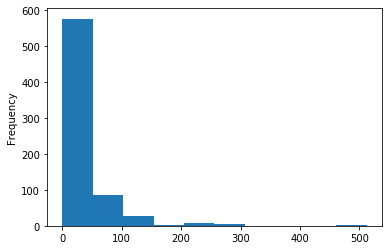

In [0]:
# Display Fare as a histogram
df['Fare'].plot(kind='hist');

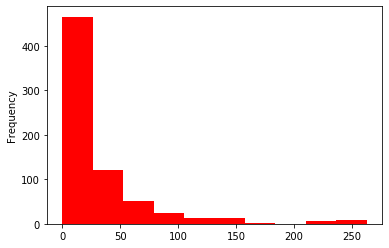

In [0]:
# Remove the outliers and change the color
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist', color='red');

In [0]:
# Convert a continous variable to a categorical variable using binning
farebins = [0,8,15,33,512]
farelabels = ['low', 'med', 'high', 'vhigh']
df['fare_groups']=pd.cut(df['Fare'], bins=farebins, labels=farelabels)
my_results=df['fare_groups'].value_counts().sort_index()
my_results

low      154
med      189
high     185
vhigh    174
Name: fare_groups, dtype: int64

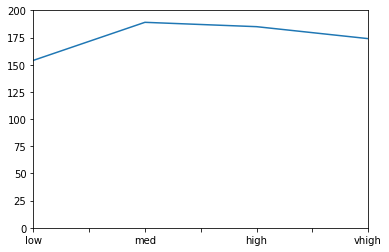

In [0]:
# Plot the results and specify the range of the y-axis
my_results.plot(ylim=(0,200));

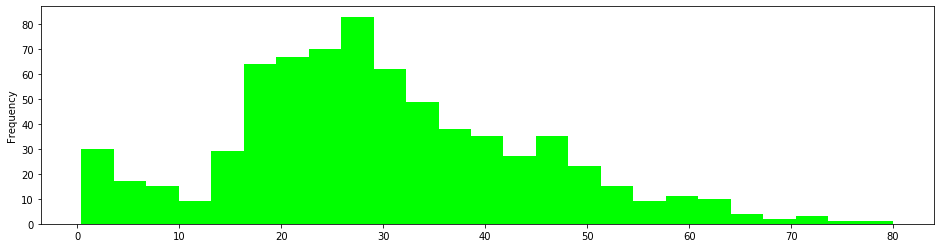

In [0]:
# Display a single contiuous variable using histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='lime');

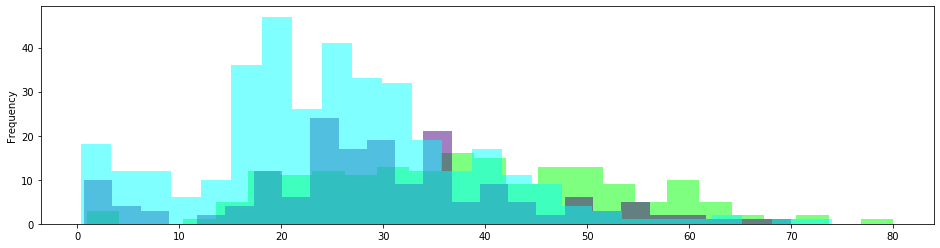

In [0]:
# Stacked histogram of continuous variable
df[df['cabin_class']=='first']   ['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='lime',alpha=0.5);
df[df['cabin_class']=='second']  ['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='indigo',alpha=0.5);
df[df['cabin_class']=='third']   ['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='aqua', alpha=0.5);

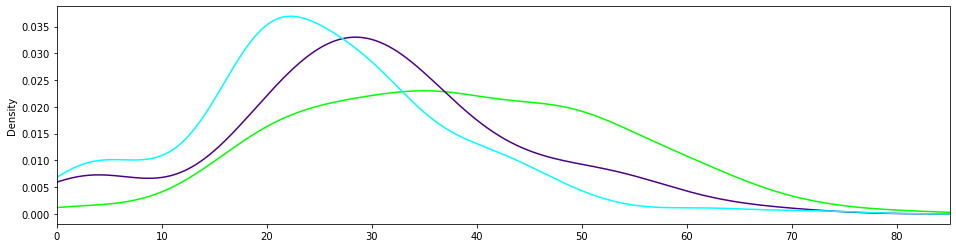

In [0]:
# Do the same using Kernel Density Estimate
df[df['cabin_class']=='first']   ['Age'].plot(kind='density', xlim=(0, 85), figsize=(16,4), color='lime');
df[df['cabin_class']=='second']  ['Age'].plot(kind='density', xlim=(0, 85), figsize=(16,4), color='indigo');
df[df['cabin_class']=='third']   ['Age'].plot(kind='density', xlim=(0, 85), figsize=(16,4), color='aqua');

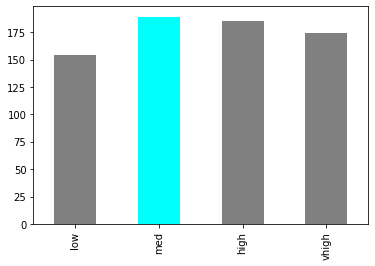

In [0]:
# Display a single categorical variable
my_results=df['fare_groups'].value_counts().sort_index()
my_results.plot(kind='bar', color=['gray', 'aqua', 'gray', 'gray']);

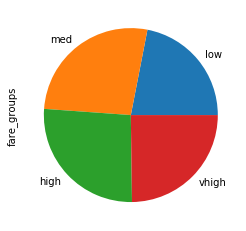

In [0]:
# Pie chart
my_results.plot(kind='pie');

In [0]:
# Compare two categorical variables using crosstabs
cab_death = pd.crosstab(df['cabin_class'], df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


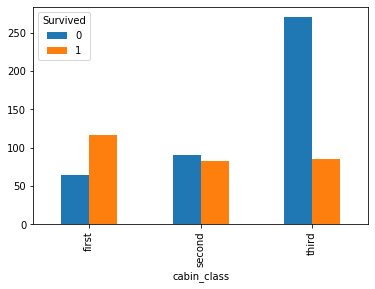

In [0]:
# Visualize it
cab_death.plot(kind='bar');

In [0]:
# Crosstab with column percents
cab_death_perc = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')
cab_death_perc

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


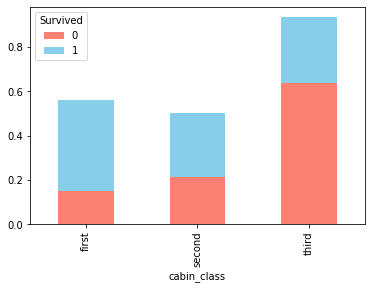

In [0]:
# Visualize
cab_death_perc.plot(kind='bar', stacked=True, color=['salmon', 'skyblue']);

In [0]:
# Crosstab with row percents
cab_death_perl = pd.crosstab(df['cabin_class'], df['Survived'], normalize='index')
cab_death_perl

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


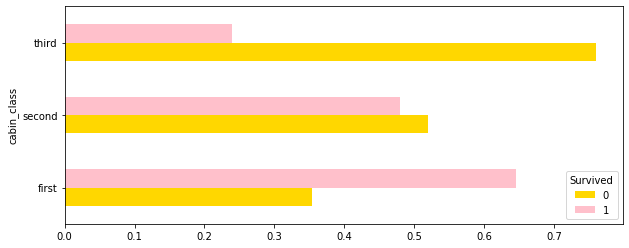

In [0]:
# Visualize
cab_death_perl.plot(kind='barh', figsize=(10,4), color=['gold', 'pink']);

In [0]:
# Compare a categorical and continuous variable
print("Overall average age:",df['Age'].mean())
cab_age=df.groupby('cabin_class')['Age'].mean()
cab_age

Overall average age: 29.618011283497882


cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

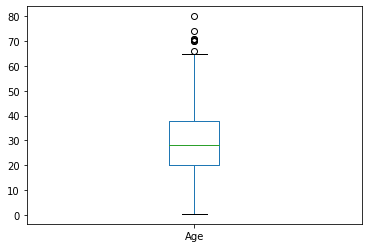

In [0]:
# Boxplot
df['Age'].plot(kind='box');

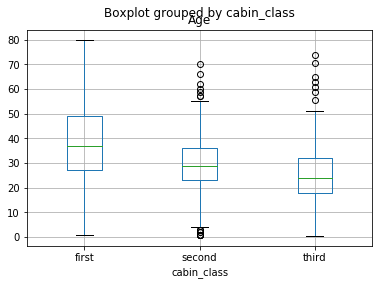

In [0]:
# Boxplot for multiple categories
df.boxplot(column='Age', by='cabin_class');

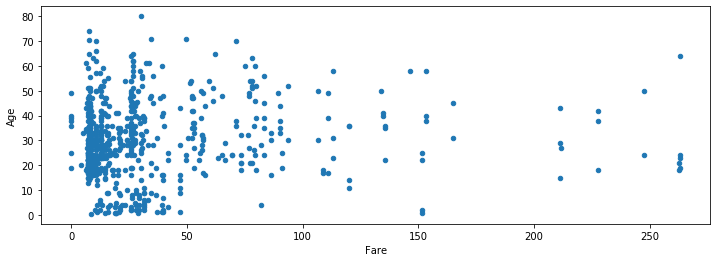

In [0]:
# Visualize age by fare
df.plot(kind='scatter', x='Fare', y='Age', figsize=(12,4));

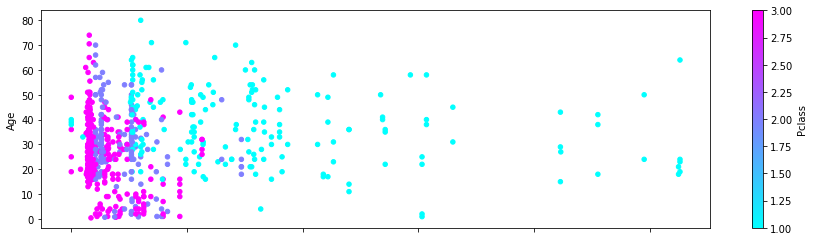

In [0]:
# Visualize three variables: age, fare and cabin class
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='cool', figsize=(15,4));

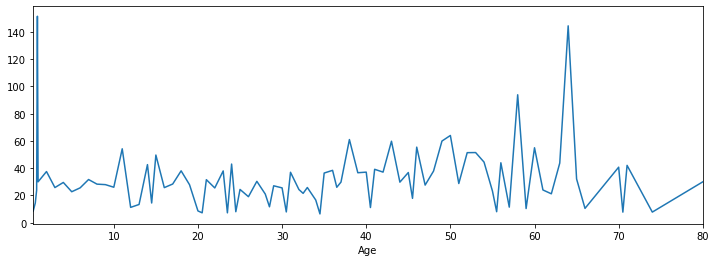

In [0]:
# Line chart for visualizing age by fare
df.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

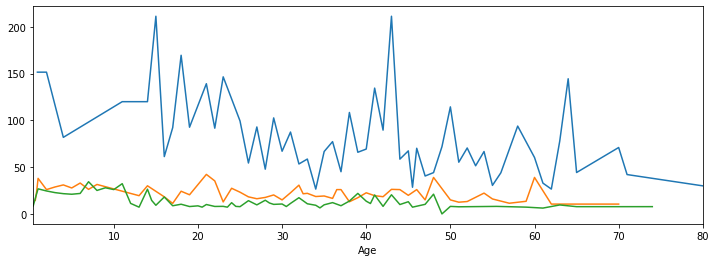

In [0]:
# Age by fare and cabin class
df[df['cabin_class']=='first'].groupby('Age')['Fare'].mean().plot(figsize=(12,4));
df[df['cabin_class']=='second'].groupby('Age')['Fare'].mean().plot(figsize=(12,4));
df[df['cabin_class']=='third'].groupby('Age')['Fare'].mean().plot(figsize=(12,4));

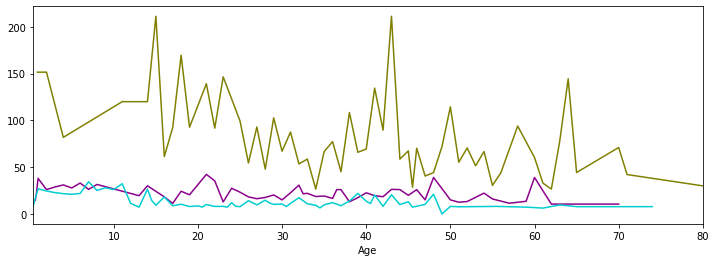

In [0]:
# Same thing in a for loop
mycolors=['olive', 'darkmagenta', 'darkturquoise']
cab_classes=['first', 'second', 'third']

for x in [0,1,2]:
  df[df['cabin_class']==cab_classes[x]].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x]);

In [0]:
# Compare multiple continuous variables 
# Correlation Matrix
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


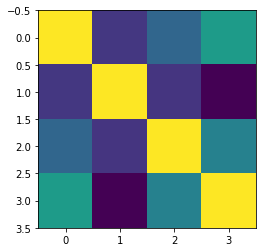

In [0]:
# Heatmap
plt.imshow(corr_matrix);

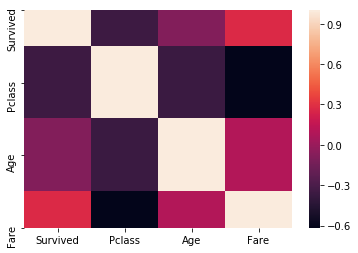

In [0]:
# Heatmap using Seaborn
sns.heatmap(corr_matrix);

**Matplotlib Commands**

In [0]:
# Create the data
x = np.linspace(0, 5, 11)
y = x ** 2
print(x)
print(y)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[ 0.    0.25  1.    2.25  4.    6.25  9.   12.25 16.   20.25 25.  ]


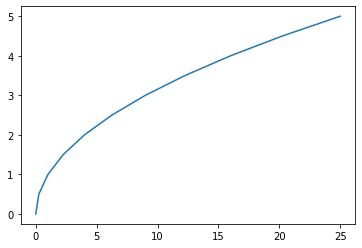

In [0]:
# Line plot
plt.plot(y, x);

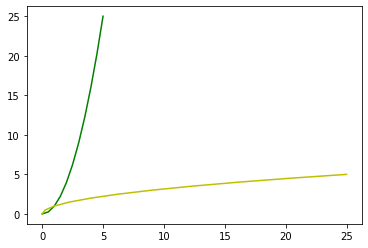

In [0]:
# Two plots together
plt.plot(x,y,'g')
plt.plot(y,x,'y');

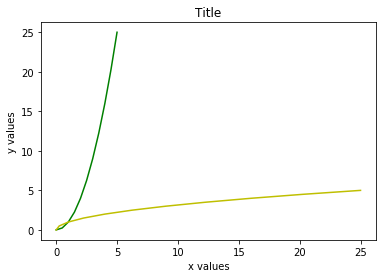

In [0]:
# Add labels and title
plt.plot()
plt.plot(x,y,'g')
plt.plot(y,x,'y')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Title');

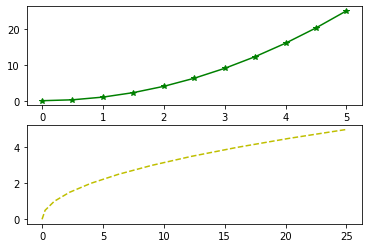

In [0]:
# Multiplots on same canvas
plt.subplot(2,1,1)
plt.plot(x,y,'g*-')
plt.subplot(2,1,2)
plt.plot(y,x,'y--');

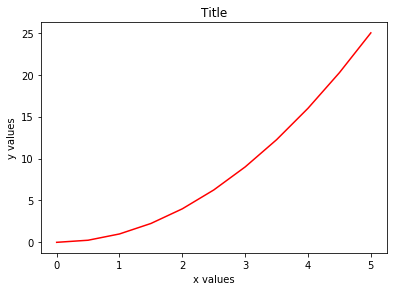

In [0]:
# Create empty canvas
fig = plt.figure()
# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Plot the data
axes.plot(x,y,'r')
axes.set_xlabel('x values')
axes.set_ylabel('y values')
axes.set_title('Title');

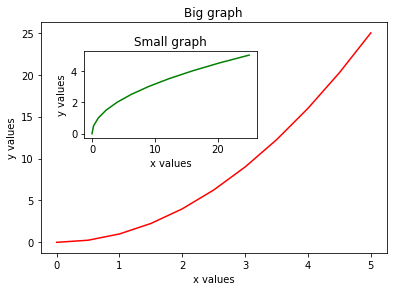

In [0]:
# Create a graph in graph
fig = plt.figure()
# Set axes for first graph
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Set axes for second graph
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])
# Plot data on first graph
axes1.plot(x,y,'r')
axes1.set_xlabel('x values')
axes1.set_ylabel('y values')
axes1.set_title('Big graph')
# Plot data on second graph
axes2.plot(y, x, 'g')
axes2.set_xlabel('x values')
axes2.set_ylabel('y values')
axes2.set_title('Small graph');

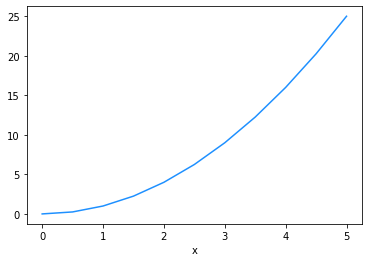

In [0]:
# Tuple unpacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=1)
axes.plot(x,y,'dodgerblue')
axes.set_xlabel('x');

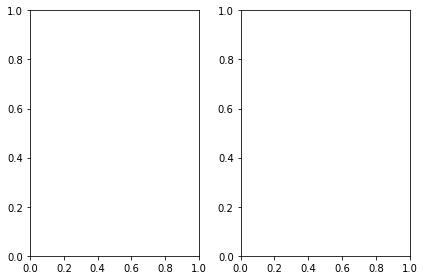

In [0]:
# Empty canvas of multiple subplots
fig, axes = plt.subplots(nrows=1, ncols=2)
fig                       
plt.tight_layout()

In [0]:
# Specify figure size and DPI when creating a Figure object
fig = plt.figure(figsize=(8,4), dpi=100)
fig

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

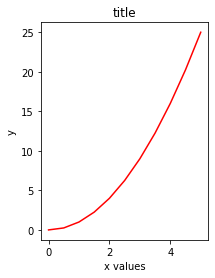

In [0]:
# Same using subplots
fig, axes = plt.subplots(figsize=(3,4))
axes.plot(x, y, 'r')
axes.set_xlabel('x values')
axes.set_ylabel('y')
axes.set_title('title');

In [0]:
# Save the figure
fig.savefig('myfile.png', dpi=200)

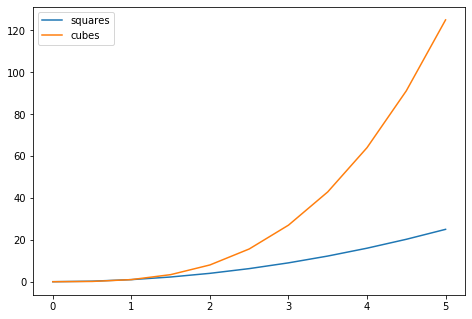

In [0]:
# Set legends
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, x**2, label='squares')
ax.plot(x, x**3, label='cubes')
ax.legend();

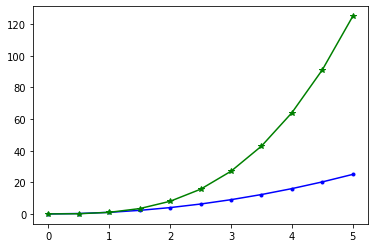

In [0]:
# Try different line color and style (MATLAB style)
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-')
ax.plot(x, x**3, 'g*-');

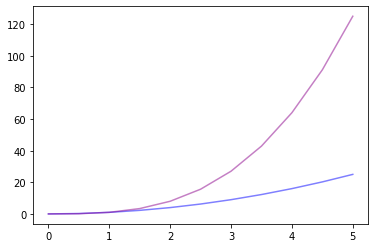

In [0]:
# Define different colors
fig, ax = plt.subplots()
ax.plot(x, x**2, color='blue', alpha=0.5 )
ax.plot(x, x**3, color='#8B008B', alpha=0.5);

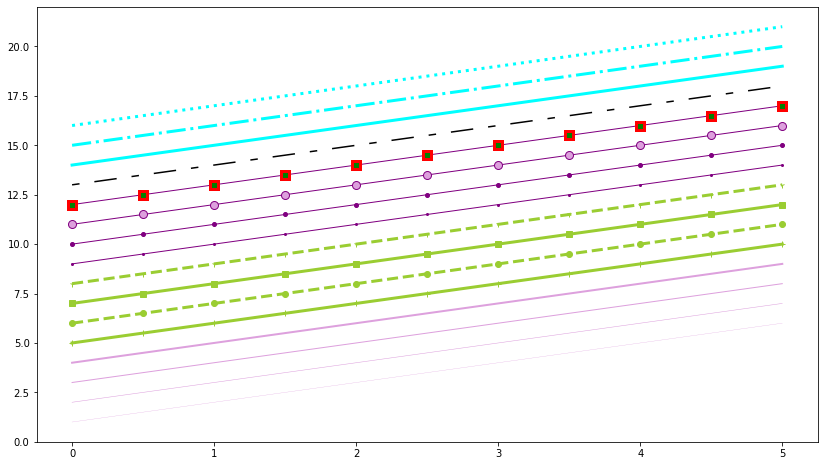

In [0]:
# Play with different line and marker styles
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(x, x+1, color="plum", linewidth=0.25)
ax.plot(x, x+2, color="plum", linewidth=0.50)
ax.plot(x, x+3, color="plum", linewidth=1.00)
ax.plot(x, x+4, color="plum", linewidth=2.00)
ax.plot(x, x+5, color="yellowgreen", lw=3, ls='-', marker='+')
ax.plot(x, x+6, color="yellowgreen", lw=3, ls='--', marker='o')
ax.plot(x, x+7, color="yellowgreen", lw=3, ls='-', marker='s')
ax.plot(x, x+8, color="yellowgreen", lw=3, ls='--', marker='1')
ax.plot(x, x+9, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+10, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+11, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="plum")
ax.plot(x, x+12, color="purple", lw=1, ls='-', marker='s', markersize=8, markerfacecolor="g", markeredgewidth=3, markeredgecolor="r")
line, = ax.plot(x, x+13, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) 
ax.plot(x, x+14, color="aqua", lw=3, linestyle='-')
ax.plot(x, x+15, color="aqua", lw=3, ls='-.')
ax.plot(x, x+16, color="aqua", lw=3, ls=':');

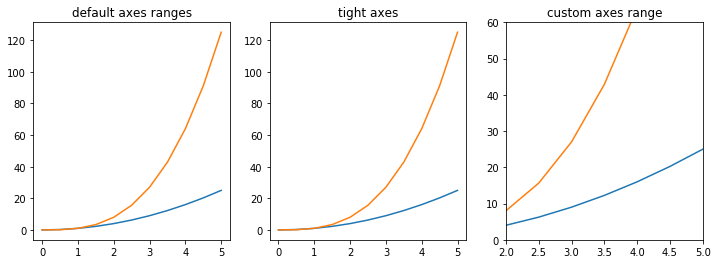

In [0]:
# Configure the ranges of the axes 
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

## More graphs

Replicate the graph "How do you like your steak prepared":

https://fivethirtyeight.com/features/how-americans-like-their-steak/

In [0]:
# Read data
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/steak-survey/steak-risk-survey.csv'
df=pd.read_csv(url)
df.head()

,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England


In [0]:
# Remove first line
df=df.drop(0)

In [0]:
# Get the columns
df.columns

Index(['RespondentID',
       'Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?',
       'Do you ever smoke cigarettes?', 'Do you ever drink alcohol?',
       'Do you ever gamble?', 'Have you ever been skydiving?',
       'Do you ever drive above the speed limit?',
       'Have you ever cheated on your significant other?', 'Do you eat steak?',
       'How do you like your steak prepared?', 'Gender', 'Age',
       'Household Income', 'Education', 'Location (Census Region)'],
      dtype='object')

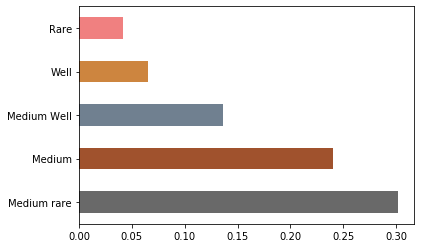

In [0]:
# Get the relative frequencies
absolute_values=df['How do you like your steak prepared?'].value_counts()
relative_values=absolute_values/len(df)

# Visualize
relative_values.plot(kind='barh', color=['dimgrey', 'sienna', 'slategrey', 'peru', 'lightcoral']);

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here